# Выбор локации для скважины

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первый-взгляд" data-toc-modified-id="Первый-взгляд-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первый взгляд</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли" data-toc-modified-id="Расчёт-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Первый взгляд

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')
df_0.info()
df_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Распределения для таблицы df_0:


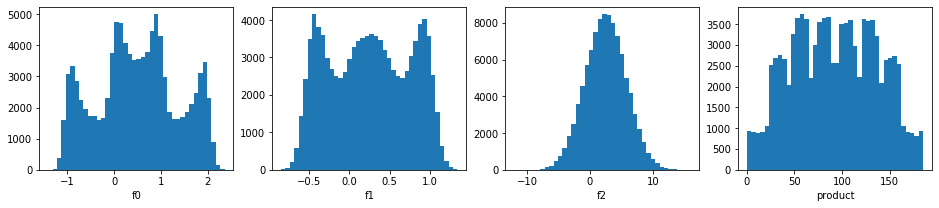

Распределения для таблицы df_1:


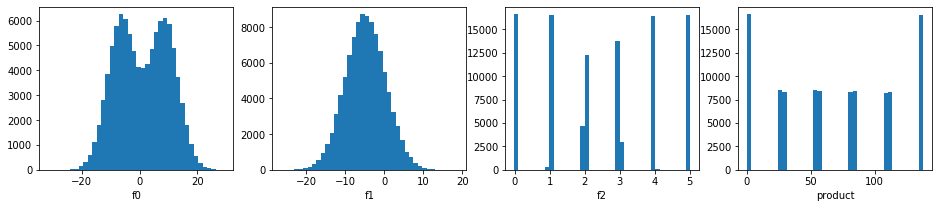

Распределения для таблицы df_2:


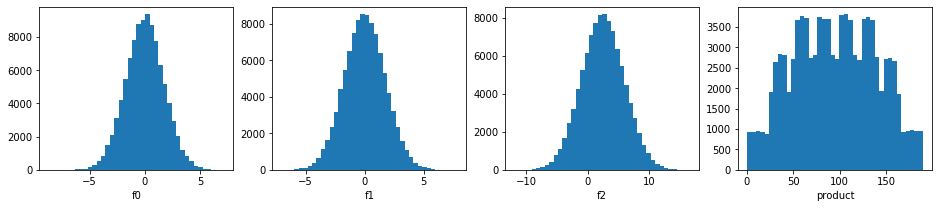

In [5]:
columns = ['f0', 'f1', 'f2', 'product']
df_datas = [df_0, df_1, df_2]
for i in range(3):
    print('Распределения для таблицы df_' + str(i) + ':')
    fig, ax = plt.subplots(1, 4, figsize=(16, 3))
    for y in range(4):
        ax[y].hist(df_datas[i][columns[y]], bins=40)
        ax[y].set_xlabel(columns[y])
    plt.show()

### Вывод 

Исходные данные - три таблицы, по одной на каждый регион, в каждой из них по 5 столбцов и 10000 строк. Названия стобцов корректны, типы данных указаны верно, пропусков нет. Исходя из условий задачи, предобработка данных не требуется, однако некоторые распределения выглядят довольно необычно. Полагаю, это объясняется синтетической природой данных. 

## Подготовка данных 

In [7]:
def split (data):
    X = data.drop(['id', 'product'], axis=1)
    y = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=123)
    return X_train, X_valid, y_train, y_valid

In [8]:
X_train_0, X_valid_0, y_train_0, y_valid_0 = split(df_0)
X_train_1, X_valid_1, y_train_1, y_valid_1 = split(df_1)
X_train_2, X_valid_2, y_train_2, y_valid_2 = split(df_2)

In [9]:
sample_names = ['X_train_', 'X_valid_', 'y_train_', 'y_valid_']

for i in range(3):
    print('\nРазмер выборок для региона {}:'.format(i + 1))
    for name in sample_names:
        print(name + str(i), 'shape:', locals()[name + str(i)].shape)    


Размер выборок для региона 1:
X_train_0 shape: (75000, 3)
X_valid_0 shape: (25000, 3)
y_train_0 shape: (75000,)
y_valid_0 shape: (25000,)

Размер выборок для региона 2:
X_train_1 shape: (75000, 3)
X_valid_1 shape: (25000, 3)
y_train_1 shape: (75000,)
y_valid_1 shape: (25000,)

Размер выборок для региона 3:
X_train_2 shape: (75000, 3)
X_valid_2 shape: (25000, 3)
y_train_2 shape: (75000,)
y_valid_2 shape: (25000,)


### Вывод 

Данные были разделены на обучающие и валидационные выборки, в соотношении 75:25.

## Обучение моделей 

In [10]:
def linear_model (X_train, X_valid, y_train, y_valid):    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    RMSE = mean_squared_error(y_valid, predictions) ** .5
    print('Средний запас предсказанного сырья: {:.2f} тыс. баррелей'.format(np.mean(predictions)), 
          '\nRMSE модели: {:.2f}\n'.format(RMSE))
    return predictions

Поскольку у нас несколько регионов, и требуется несколько раз обучать модель, оценивать её и делать предсказания, все эти операции были упакованы в функцию `linear_model`. На вход она принимает 4 выборки, которые использует для обучения модели линейной регрессии и предсказания значений. В процессе работы функции на экран выводится среднее предсказанное значение, а так же значение метрики RMSE. Функция возвращает весь список предсказаний, полученных от модели.

In [11]:
print('Регион 1:')
predictions_0 = pd.Series(linear_model (X_train_0, X_valid_0, y_train_0, y_valid_0))
print('Регион 2:')
predictions_1 = pd.Series(linear_model (X_train_1, X_valid_1, y_train_1, y_valid_1))
print('Регион 3:')
predictions_2 = pd.Series(linear_model (X_train_2, X_valid_2, y_train_2, y_valid_2))

Регион 1:
Средний запас предсказанного сырья: 92.55 тыс. баррелей 
RMSE модели: 37.65

Регион 2:
Средний запас предсказанного сырья: 69.28 тыс. баррелей 
RMSE модели: 0.90

Регион 3:
Средний запас предсказанного сырья: 95.10 тыс. баррелей 
RMSE модели: 40.13



### Вывод 

Значения, полученные от модели на данных 1 и 3 региона практически совпадают. Модели оценивают средний запас сырья в 92 и 95 тысяч баррелей соответственно, но, при этом, значение RMSE достаточно высокое - 37.6 для первого региона и 40.1 для третьего. Получается, что модель сильно переоценила объём запасов нефти, практически на 40 тысяч баррелей. В то же время регион №2 имеет предсказание в 69 тысяч баррелей, но RMSE = 0.9, что прибавляет уверенности в предсказании. Таким образом, второй регион на данном этапе выглядит куда более перспективным, на фоне двух других.

## Расчёт прибыли

In [12]:
COST_PRICE = (1 * (10**10)) / 200
WELLS_COUNT = 200
BARREL_PROFIT = 450000

Сохраним для дальнейших вычислений нужные нам значения:  
- `COST_PRICE` - себестоимость разработки одной скважины;  
- `WELLS_COUNT` - количество планируемых скважин в регионе;  
- `BARREL_PROFIT` - выручка с 1 тысячи баррелей нефти.

In [13]:
need_barrels = COST_PRICE / BARREL_PROFIT
need_barrels

111.11111111111111

Путём нехитрых вычислений мы определили, что для окупаемости в каждой скважине запас сырья должен быть более 111 тысяч баррелей. На данный момент это выглядит неутешительно, потому что модель прогнозировала средний запас сырья на сильно меньшем уровне. Ситуация может измениться, покольку нас интересуют не все скважины подряд, а только 200 лучших. Посмотрим, какую суммарную прибыль с региона удастся получить в таком случае.

In [14]:
def profit_calc (predictions_500, y_valid):
    
    target = y_valid.reset_index(drop=True)
    top_wells = predictions_500.sort_values(ascending=False)[:200]
    product = target[top_wells.index].sum()
    region_profit = (product * BARREL_PROFIT) - (200 * COST_PRICE)
    return region_profit

In [15]:
def bootstrap (predictions, y_valid):
    
    profit_values = []
    state = RandomState(12345)
    
    for i in range(1000):
        bootstrap_sample = predictions.sample(frac=.02, random_state=state)
        profit_values.append(profit_calc(bootstrap_sample, y_valid))
        
    return profit_values

In [16]:
def show_profit (predictions, y_valid, region_name):
    
    profit_values = bootstrap(predictions, y_valid)
    
    print('Распределение прибыли для региона {}:'.format(region_name))
    profit_values = pd.Series(profit_values)
    profit_values.hist(bins=40)
    plt.show()
    confidence_interval = (profit_values.quantile(0.025), profit_values.quantile(0.975)) 
    risk = (profit_values < 0).mean()
    print('Средняя прибыль:', profit_values.mean())
    print('95% доверительный интервал:', confidence_interval)
    print('Вероятность убытков:', risk)
    print('\n\n')

В функции `profit_calc` производится расчёт прибыли для одного региона. В качестве параметров ей необходимо передать 500 случайных предсказаний и весь список правильных ответов. Функция выберет из этих 500 лучшие 200, затем по индексам найдёт соответствующие значения целевого признака, просуммирует их, домножит на прибыль с одного барреля, и из этого результата вычтет себестоимость. Результатом будет значение прибыли, которое функция вернёт обратно.  

Функция `bootstrap` отвечает за отбор тысячи выборок по 500 значений из списка предсказаний методом бутстрепа. На вход она принимает полный список предсказаний и полный список правильных ответов. В процессе работы вызывается функция `profit_calc`, а в конце `bootstrap` возвращает список из 1000 значений общего количества сырья, добытого на 200 выбранных скважинах.  

В функции `show_profit` производится рассчёт оставшихся значений - риска убытков и доверительного интервала. Также, эта функция строит график распределения прибыли и выводит все данные на экран. В качетсве параметров она принимает все предсказания, полученные от модели, целевой признак и номер (или название) региона. 

Распределение прибыли для региона 1:


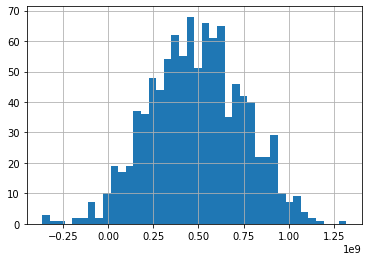

Средняя прибыль: 489535789.67665374
95% доверительный интервал: (5488073.137087633, 975341333.8473293)
Вероятность убытков: 0.023



Распределение прибыли для региона 2:


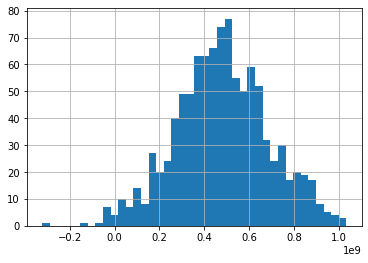

Средняя прибыль: 480266280.61365503
95% доверительный интервал: (56016519.85845819, 883184110.9914954)
Вероятность убытков: 0.014



Распределение прибыли для региона 3:


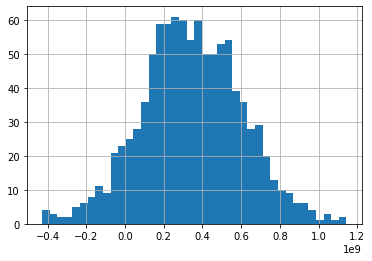

Средняя прибыль: 343633351.97811216
95% доверительный интервал: (-174144636.06687534, 856751050.5026959)
Вероятность убытков: 0.091





In [17]:
show_profit(predictions_0, y_valid_0, 1)
show_profit(predictions_1, y_valid_1, 2)
show_profit(predictions_2, y_valid_2, 3)

### Вывод

В результате работы функции мы получили три графика с нормальным распределением, как и ожидалось. Самое большое значение прогнозируемой средней прибыли получилось у региона №1 - 489 млн, с риском убытков в 2.3%, что на грани фола по условию задачи. Сразу за ним идёт регион №2 с прогонозируемой прибылью в 480 млн, но здесь уже веротяность убытка 1.4%, что гораздо приятнее. Последний, третий регион, показал худшие значения: прибыль 343 млн, при вероятности убытков в 9.1%, при этом отрицательная прибыль даже попала в границы 95% доверительного интервала.

## Общий вывод 

Исходя из условий задачи, мы не можем рассматривать регионы с риском убытков более 2.4%, поэтому регион №3 сразу нам не подходит. Остаются регионы 1 и 2, у которых прибыль примерно на одном уровне (489 млн и 480 млн соответственно), но у них разный риск провала. Так, в регионе №1 потенциально можно получить немного бóльшую прибыль, однако и риск убытка там больше в 1.6 раза. Также стоит вспомнить, что модель, которая строила предсказания по объёму запаса сырья, меньше всего ошибалась именно в регионе №2. Строго говоря, она в нём почти не ошибалась, в то время как значения для первого региона она завысила на 40.6%. Исходя из всего этого, наиболее перспективным для разработки кажется именно регион №2.